In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import math

# Taxa de desemprego em relação ao PIB, de 2012 a 2021
# Assunto: Regressão Linear Simples

# Pega os dados da planilha
dados = pd.read_excel("PIBxDesemprego.xlsx")
taxa = dados['Taxa de Desemprego']
pib = dados['PIB']

# Calcula o coeficiente de relação(r)
somatorio_taxa_pib = 0
somatorio_taxa_quadrado = 0
somatorio_pib_quadrado = 0
for i in range (len(taxa)):
  somatorio_taxa_pib += (taxa[i] * pib[i])
  somatorio_taxa_quadrado += (taxa[i]**2)
  somatorio_pib_quadrado += (pib[i]**2)
soma_pib = sum(pib)
soma_taxa = sum(taxa)
n=len(pib)
r_numerador = (somatorio_taxa_pib * n)-(soma_taxa * soma_pib)
r_denominador = math.sqrt(((n * somatorio_pib_quadrado) - (soma_pib**2)) * (n*somatorio_taxa_quadrado - (soma_taxa**2)))
r = r_numerador/r_denominador

# Verifica o coeficiente de relação (r)
r = abs(r)
print("r = ", round(r, 4))
if(r > 0 and r <= 0.3):
  print("Correlação fraca")
elif(r > 0.3 and r <= 0.6):
  print("Correlação media")
elif(r > 0.6 and r <= 0.9 ):
  print("Correlação forte")
elif(r > 0.9 and r <= 0.99):
  print("Correlação fortissima")
elif(r > 0.99):
  print("Correlação perfeita")
else:
  print("Correlação nula")

# Verifica se o modelo é adequado (r2 ou r²)
r2 = r**2
print("r² = ", round(r2, 4))
if(r2 >= 1):
  print("O modelo adotado explica a realidade com perfeição")
elif(r2 == 0):
  print("O modelo adotado não explica nada a realidade")

r =  0.7677
Correlação forte
r² =  0.5893


In [13]:
# Calcula o coeficiente de regressão B
b_numerador = somatorio_taxa_pib - ((soma_taxa * soma_pib)/n)
b_denominador = somatorio_pib_quadrado - ((soma_pib**2)/n)
b = b_numerador/b_denominador
print("\nb =", b)

# Calcula o coeficiente de regressão A
x_barra = soma_pib/n
y_barra = soma_taxa/n
a = y_barra - b * x_barra
print("a =", a)

# Calcula o modelo de regressão (yr)
yr = a + b * pib
print("\nyr = {0} + {1} * pib".format(a, b))
#Encontra o maior e menor valor
v_max = int(max(pib))
v_min = int(min(pib))

# Função para plotar o gráfico
def grafico():
  plt.rcParams['xtick.labelsize'] = 18
  plt.rcParams['ytick.labelsize'] = 18
  plt.rcParams['legend.fontsize'] = 18
  plt.figure(figsize=(12,6))
  plt.scatter(pib, taxa, label="Dados")
  plt.plot(pib, yr, color="red", label="yr")
  plt.xticks(range(v_min, v_max, 100000))
  plt.title('PIB x Desemprego 2012 - 2021 (Brasil)', fontsize=22)
  plt.xlabel("PIB (em milhão)", fontsize=20)
  plt.ylabel("Taxa de desemprego (%)", fontsize=20)
  plt.legend()
  plt.grid()
  plt.show()

# Função para prever a taxa de desemprego em relação ao PIB
def previsao():
  valor_para_previsao = float(input("Informe PIB para prever a taxa: "))
  previsao = a + b * valor_para_previsao
  print("\nA taxa de desemprego prevista é de {:.2f} %".format(previsao))


b = 7.443780580056059e-06
a = -1.5575056958114324

yr = -1.5575056958114324 + 7.443780580056059e-06 * pib


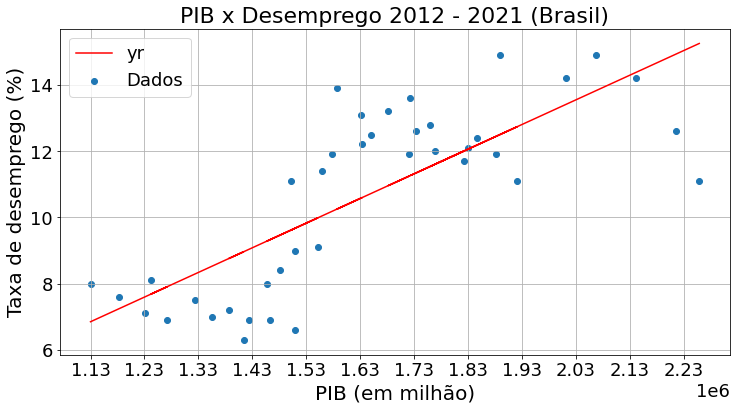

In [14]:
grafico()
# Exemplo de PIB para previsao: 1300000
# previsao()